# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 
Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. 
Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

Импортируем необходимые библиотеки

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # прочитаем csv-файл
data.to_csv('file_name.csv', index=False)

Выведем первые 20 строчек датафрейма data на экран.

In [3]:
data.head(20) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


 Выведем основную информацию о датафрейме с помощью метода info().

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбца и 23699 строки. Типы данных в столбцах — bool(2), float64(14), int64(3), object(3). В некоторых столбцах есть некорректный тип данных. Количество значений в столбцах различается.  

Согласно документации к данным:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении.



В названиях колонок 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000' видны следующие нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Названия столбцов не записаны в «змеином регистре».

Исправим стиль в заголовках столбцов.

In [5]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'}) # переименование столбцов

In [6]:
data.columns # проверка результатов - перечень названий столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Посчитаем количество пропущенных значений. 

In [7]:
data.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенные значения есть в 14 столбцах. 

Построим общую гистограмму для всех числовых столбцов таблицы. 

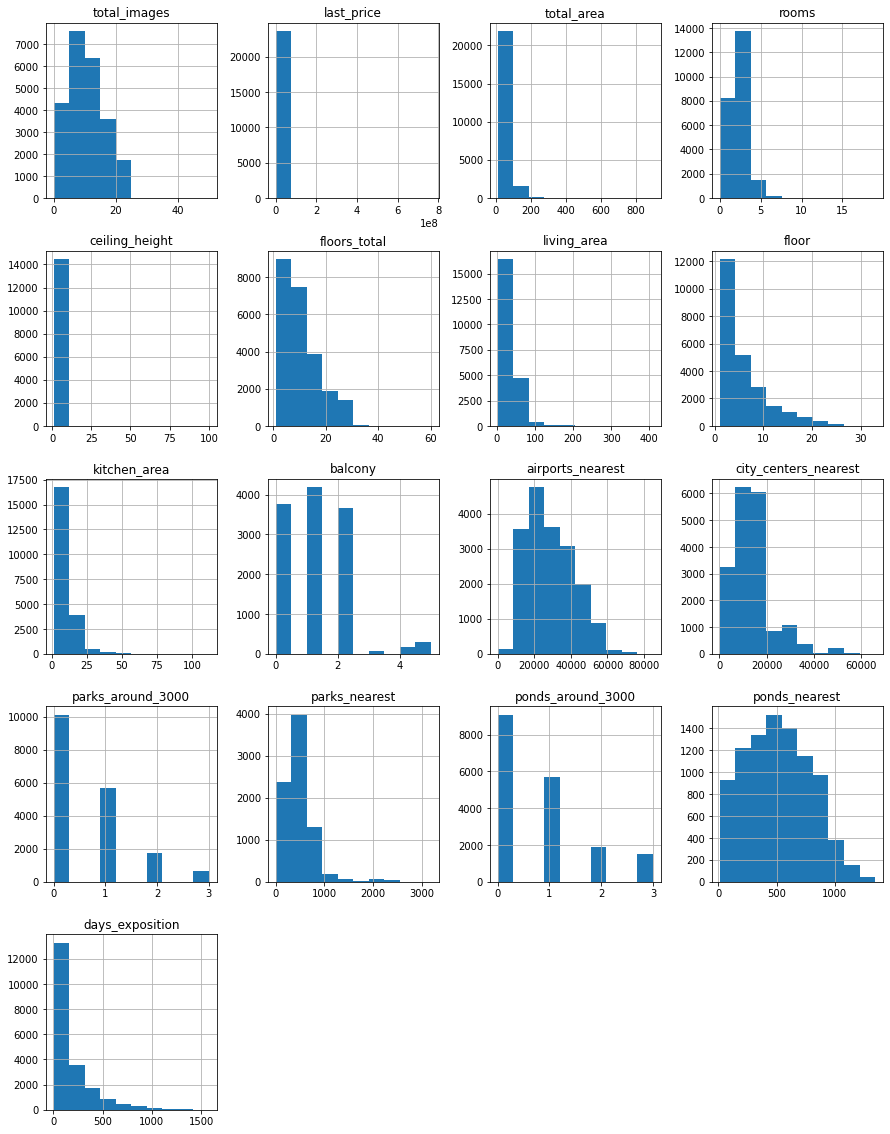

In [8]:
data.hist(figsize=(15,20));

In [9]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [10]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


Итак, в таблице 22 столбца и 23699 строки. В некоторых столбцах есть некорректный тип данных, много пропущенных значений (в 14 столбцах). По ряду признаков есть аномальные значения (например, высота потолоков, равная 100). В названиях колонок видны нарушения стиля, но мы это уже исправили. 

### Предобработка данных

Приступим к обработке пропущенных значений. 

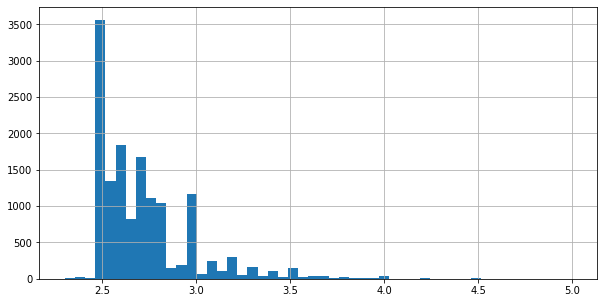

In [11]:
# Рассмотрим столбец 'ceiling_height' - высота потолков (количество пропусков 9195). Построим гистограмму.
data['ceiling_height'].hist(range=(2.3,5),bins=50, figsize=(10, 5));

По графику видно, что большинство квартир с высотой потолков равной примерно 2,5 - 2,8 м. Но также видим, что есть выбросы, как в меньшую так и в большую сторону. 

In [12]:
data['ceiling_height'].describe() # посмотрим на список характерных значений столбца ceiling_height

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

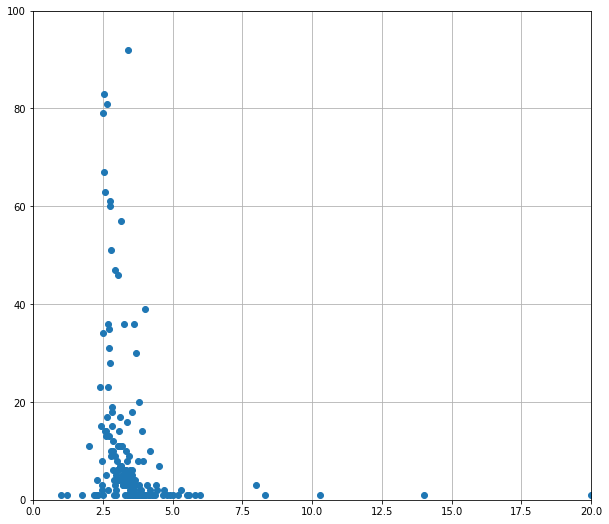

In [13]:
data['ceiling_height'].value_counts().plot(style='o', xlim=(0, 20),ylim=(0, 100), grid=True, figsize=(10, 9));

Возможные причины пропусков - продавцы не знали высоту потолков или не считали это обязательным для заполнения пунктом.

In [14]:
# Заменим пропуски и избавимся от аномальных значений. 
# Минимальной нормой в России считается высота потолка 2,4 метра.
data.loc[data['ceiling_height']<2.4, 'ceiling_height'] = 2.4 # заменим все значения, что меньше нормальной высоты потолков на 2.4.
data.loc[data['ceiling_height'] > 4, 'ceiling_height'] = 4 # за максимальную высоту возьмем значение 4.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) # остальные пропуски заменим медианным значением высоты потолков. 
data['ceiling_height'].isna().sum()

0

Рассмотрим столбец 'balcony'— число балконов.

In [15]:
# Изменим тип данных на int и заменим пропущенные значения на 0.
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['balcony'].isna().sum()

0

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. 

Рассмотрим столбец 'floors_total' - сколько всего этажей в доме.

In [16]:
# Поменяем тип данных на int и заполним пропуски в столбцах floors_total значениями из столбца - floor(этаж).
data['floors_total'] = data['floors_total'].fillna(data['floor']).astype('int') 
data['floors_total'].isna().sum()

0

Рассмотрим столбец 'is_apartment' - апартаменты (булев тип). Пропущенных значений в этом столбце 20924 - слишком много. Заполнять пропуски в нем значениями False некорректно, так как скорее всего проблема в полученных данных. Скорее всего при заполнении объявлений о продаже этот пункт пропускали, как необязательный. Поэтому пропуски заполним значением 'Нет данных'.

In [17]:
data['is_apartment'] = data['is_apartment'].fillna('Нет данных')
data['is_apartment'].isna().sum()

0

Рассмотрим столбцы kitchen_area — площадь кухни, living_area — жилая площадь. Так как апартаменты находятся в нежилых зданиях и не относятся к жилой недвижимости, мы можем заполнить пропуски в столбце kitchen_area нулевым значением. 

In [18]:
data['kitchen_area'].isna().sum() # узнаем кол-во пропусков 

2278

In [19]:
data.loc[(data['is_apartment'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0 # заменим на ноль пропуски в столбцах с площадб кухни в апартаментах 

In [20]:
data['kitchen_area'].isna().sum() # заменили 15 пропусков

2263

Тоже самое проделаем с жилой площадью.

In [21]:
data['living_area'].isna().sum() # узнаем кол-во пропусков 

1903

In [22]:
data.loc[(data['is_apartment'] == True) & (data['living_area'].isna()), 'living_area'] = 0 

In [23]:
data['living_area'].isna().sum() # заменили 8 пропусков 

1895

Площадь кухни и общая площадь квартир - total_area взаимосвязаны. Коэф. корреляции (0.6).


Создадим функцию, которая на основании данных из столбца total_area сформирует новый столбец total_area_category, в который войдут следующие категории:

- 'небольшая квартира', если ее общая площадь < 30 
- 'стандартная квартира', если ее общая площадь от 30 до 60 
- 'большая квартира', если ее общая площадь > 60 


In [24]:
def categorize_area(area):
# реализуем логику функции
    try:
        if 0 < area <= 30:
            return 'небольшая квартира'
        elif 30 < area <= 60:
            return 'стандартная квартира'
        elif area >= 60:
            return 'большая квартира'
    except:
        pass
print(categorize_area(55)) # проверим работоспособность функции

стандартная квартира


In [25]:
data['total_area_category'] = data['total_area'].apply(categorize_area)

In [26]:
data[['total_area_category', 'kitchen_area']]

,total_area_category,kitchen_area
0,большая квартира,25.00
1,стандартная квартира,11.00
2,стандартная квартира,8.30
3,большая квартира,NaN
4,большая квартира,41.00
...,...,...
23694,большая квартира,13.83
23695,стандартная квартира,8.50
23696,стандартная квартира,NaN
23697,большая квартира,23.30


Заполним пропуски в столбце kitchen_area медианным значением по каждой группе total_area_category.

In [27]:
data.groupby('total_area_category')['kitchen_area'].median().sort_values(ascending=False).to_frame()

,kitchen_area
total_area_category,
большая квартира,11.9
стандартная квартира,8.3
небольшая квартира,6.0


Чем больше площадь квартиры, тем больше площадь кухни.

In [28]:
list_of_total_area_category = ['большая квартира', 'стандартная квартира', 'небольшая квартира']
for column in list_of_total_area_category:
    value_for_filling = data.groupby('total_area_category')['kitchen_area'].median().get(key=column)
    data['kitchen_area'] = data.groupby('total_area_category')['kitchen_area'].apply(lambda x: x.fillna(x.median()))

In [29]:
data['kitchen_area']

0        25.00
1        11.00
2         8.30
3        11.90
4        41.00
         ...  
23694    13.83
23695     8.50
23696     8.30
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

In [30]:
data['kitchen_area'].isna().sum()

0

Аналогично с жилой площадью living_area.

In [31]:
data.groupby('total_area_category')['living_area'].median().sort_values(ascending=False).to_frame()

,living_area
total_area_category,
большая квартира,46.5
стандартная квартира,23.0
небольшая квартира,16.2


In [32]:
list_of_total_area_category = ['большая квартира', 'стандартная квартира', 'небольшая квартира']
for column in list_of_total_area_category:
    value_for_filling = data.groupby('total_area_category')['living_area'].median().get(key=column)
    data['living_area'] = data.groupby('total_area_category')['living_area'].apply(lambda x: x.fillna(x.median()))

In [33]:
data['living_area']

0        51.0
1        18.6
2        34.3
3        46.5
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697    46.5
23698    12.3
Name: living_area, Length: 23699, dtype: float64

In [34]:
data['living_area'].isna().sum()

0

Рассмотрим столбец 'locality_name' — название населённого пункта.

In [35]:
# Причина пропусков неизвестна, заполнить верными данными не можем, поэтому пропуски заполним значением 'Нет данных'.
data['locality_name'] = data['locality_name'].fillna('Нет данных')
data['locality_name'].isna().sum()

0

Было бы хорошо сделать обязательным для заполнения это поле в объявлении.

- В столбцах airports_nearest, city_centers_nearest, parks_around_3000, ponds_around_3000, parks_nearest и ponds_nearest данные не были заполнены. Пропуски в них не заполняем, т.к. мы не знаем расположения квартир, адрес отсутствует.
- Столбец days_exposition — сколько дней было размещено объявление (от публикации до снятия). 
В нем так же оставим пропуски, так как возможно объявления еще не сняли с продажи.

Рассмотрим столбец 'first_day_exposition' в котором хранится дата объявления. Тип данных в столбце не соответсвует типу данных datetime, поэтому переведем данные в формат даты только без времени, т.к. время не указано.

In [36]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Будем разбираться с дубликатами. Сначала проверим есть ли явные дубликаты. 

In [37]:
data.duplicated().sum()

0

In [38]:
# Явных дубликатов нет. Проверим на неявные дубликаты
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [39]:
len(data['locality_name'].value_counts()) # кол-во уникальных значений 

365

В столбце locality_name есть неявные дубликаты. Где-то посёлок, где-то посёлок городского типа и т.д. Нужно найти все дубликаты и избавиться от них. 

In [40]:
replace_dict = {
    'посёлок': 'поселок',
    'городской посёлок': 'поселок городского типа',
    'городской поселок': 'поселок городского типа',
    'коттеджный посёлок': 'поселок',
    'коттеджный поселок': 'поселок',
}


In [41]:
def locality_processing(locality_name):
    for key, value in replace_dict.items():
        locality_name = locality_name.replace(key, value)
    
    return locality_name

In [42]:
locality_processing('городской посёлок Свирьстрой')

'поселок городского типа Свирьстрой'

In [43]:
data['locality_name'] = data ['locality_name'].apply(locality_processing)

Рассмотрим столбец last_price - цена на момент снятия с публикации.

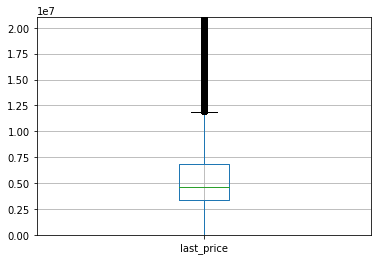

In [44]:
data.boxplot(column=['last_price'])
plt.ylim(0, 21000000);

Видим насколько медиана не стремится к длинному хвосту высоких значений. 

In [45]:
data['last_price'].min() # неизвестно откуда взялась такая цена, возможно ошиблись при заполнении поля. 

12190.0

In [46]:
data[(data['last_price']<400000)] # посмотрим есть ли цены ниже 400 тыс. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,total_area_category
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,Нет данных,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,большая квартира


In [47]:
data = data.drop([8793],axis=0) # как раз это та строка со стоимость 12190, удалим ее.

In [48]:
data['last_price'].max() # посмотрим на максимальную цену. (неплохо 763 млн) 

763000000.0

По графику видим, что есть значения, которые находятся выше 115 - будем их считать аномалиями.

In [49]:
data[(data['last_price']>115000000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,total_area_category
793,20,135000000.0,310.0,2018-05-22,4,3.30,5,250.00,2,Нет данных,False,False,50.00,0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0,большая квартира
1026,20,155000000.0,310.0,2018-10-12,5,4.00,3,190.00,3,Нет данных,False,False,63.00,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN,большая квартира
1188,20,118000000.0,290.6,2018-06-01,6,3.82,6,188.70,3,Нет данных,False,False,22.00,1,Санкт-Петербург,25309.0,6224.0,1.0,217.0,0.0,NaN,316.0,большая квартира
1300,14,120000000.0,280.0,2018-07-12,5,4.00,4,162.00,3,Нет данных,False,False,30.00,0,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0,большая квартира
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.00,5,Нет данных,False,False,40.00,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,большая квартира
1928,11,125000000.0,224.5,2017-01-24,4,2.65,4,163.50,3,False,False,False,30.00,1,Санкт-Петербург,22805.0,2335.0,0.0,NaN,2.0,497.0,174.0,большая квартира
2243,9,130278280.0,304.0,2015-07-24,5,3.11,9,46.50,7,Нет данных,False,False,11.90,0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0,большая квартира
2536,16,159984000.0,242.4,2015-08-27,4,3.85,9,131.00,7,Нет данных,False,False,20.00,0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0,большая квартира
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5,46.50,5,Нет данных,False,False,60.00,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,большая квартира
4996,20,124000000.0,124.5,2017-10-12,4,3.00,4,67.20,2,False,False,False,20.00,0,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0,большая квартира


Очень дорогие квартиры могут исказить распределение цены, поэтому удалим их. 

In [50]:
len(data[(data['last_price']>115000000)])

37

In [51]:
data = data.loc[data['last_price']<115000000]

In [52]:
len(data[(data['last_price']>115000000)])

0

In [53]:
data['last_price'] = data['last_price'].astype('int') # изменим тип для удобства на int, часть после запятой мало нас интересует. 
data['last_price'].dtypes

dtype('int64')

Проанализируем столбец total_area (общая площадь квартиры в квадратных метрах (м²)). Посмотрим есть ли в нем выбросы.

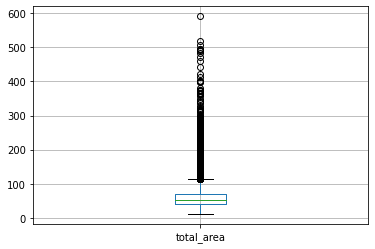

In [54]:
data.boxplot(column=['total_area']);

На графике видно, что медиана не стремится к длинному хвосту высоких значений. Исключим из анализа значения общей площади квартиры, превышающие 110 м². 

In [55]:
len(data[(data['total_area']>110)])

1338

In [56]:
data = data.loc[data['total_area']<110]

In [57]:
len(data[(data['total_area']>110)])

0

In [58]:
data['total_area'] = data['total_area'].astype('int') # для удобства дальнейших расчетов изменим тип на int.
data['total_area'].dtypes

dtype('int64')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22278 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22278 non-null  int64         
 1   last_price            22278 non-null  int64         
 2   total_area            22278 non-null  int64         
 3   first_day_exposition  22278 non-null  datetime64[ns]
 4   rooms                 22278 non-null  int64         
 5   ceiling_height        22278 non-null  float64       
 6   floors_total          22278 non-null  int64         
 7   living_area           22278 non-null  float64       
 8   floor                 22278 non-null  int64         
 9   is_apartment          22278 non-null  object        
 10  studio                22278 non-null  bool          
 11  open_plan             22278 non-null  bool          
 12  kitchen_area          22278 non-null  float64       
 13  balcony         

Предобработку завершили. Где возможно было заменили пропуски. Избавились от аномалии. Устранили неявные дубликаты в названиях населённых пунктов. Изменили тип данных в некоторых столбцах, где это было необходимо. 

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем и добавим в таблицу: **цену одного квадратного метра**

In [60]:
data['price_1m'] = data['last_price'] / data['total_area']
data['price_1m'].describe()

count     22278.000000
mean      96262.279108
std       37650.719102
min        7962.962963
25%       76042.877907
50%       94444.444444
75%      112857.142857
max      848484.848485
Name: price_1m, dtype: float64

Посчитаем и добавим в таблицу: **день публикации объявления (0 - понедельник, 1 - вторник и т.д.)**

In [61]:
data['weekday'] = data['first_day_exposition'].dt.weekday

Посчитаем и добавим в таблицу: **месяц публикации объявления**

In [62]:
data['month'] = data['first_day_exposition'].dt.month

Посчитаем и добавим в таблицу: **год публикации объявления**

In [63]:
data['year'] = data['first_day_exposition'].dt.year

Посчитаем и добавим в таблицу: **тип этажа квартиры (значения — «первый», «последний», «другой»)**

In [64]:
def floor_category(row):
# реализуем логику функции
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [65]:
data['floor_type'] = data.apply(floor_category, axis=1)

In [66]:
#Проверим работоспособность функции для разных значений.
row_values = [10, 10]
row_columns = ['floor', 'floors_total']
row = pd.Series(data=row_values, index=row_columns)
print(floor_category(row))

последний


Посчитаем и добавим в таблицу: **расстояние в км до центра города**

In [67]:
data['city_centers_nearest'] = round(data['city_centers_nearest']/1000,0)

### Проведите исследовательский анализ данных

Изучим и опишем следующие параметры:
   - общая площадь;
   - жилая площадь;
   - площадь кухни;
   - цена объекта;
   - количество комнат;
   - высота потолков;
   - этаж квартиры;
   - тип этажа квартиры («первый», «последний», «другой»);
   - общее количество этажей в доме;
   - расстояние до центра города в метрах;
   - расстояние до ближайшего аэропорта;
   - расстояние до ближайшего парка;
   - день и месяц публикации объявления

In [68]:
data[['total_area', 'living_area', 'kitchen_area','last_price', 'rooms', 'ceiling_height', 'floor', 'floors_total', 'city_centers_nearest', 'airports_nearest', 'parks_nearest']].describe().astype('int')

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest
count,22278,22278,22278,22278,22278,22278,22278,22278,16810,16792,7182
mean,53,30,9,5236028,1,2,5,10,14,28883,493
std,18,13,4,3235065,0,0,4,6,8,12862,340
min,12,0,0,430000,0,2,1,1,0,0,1
25%,39,18,7,3350000,1,2,2,5,10,18269,289
50%,50,29,9,4500000,2,2,4,9,13,27054,456
75%,65,40,11,6200000,3,2,8,16,17,37447,616
max,109,101,55,53000000,7,4,33,60,66,84869,3190


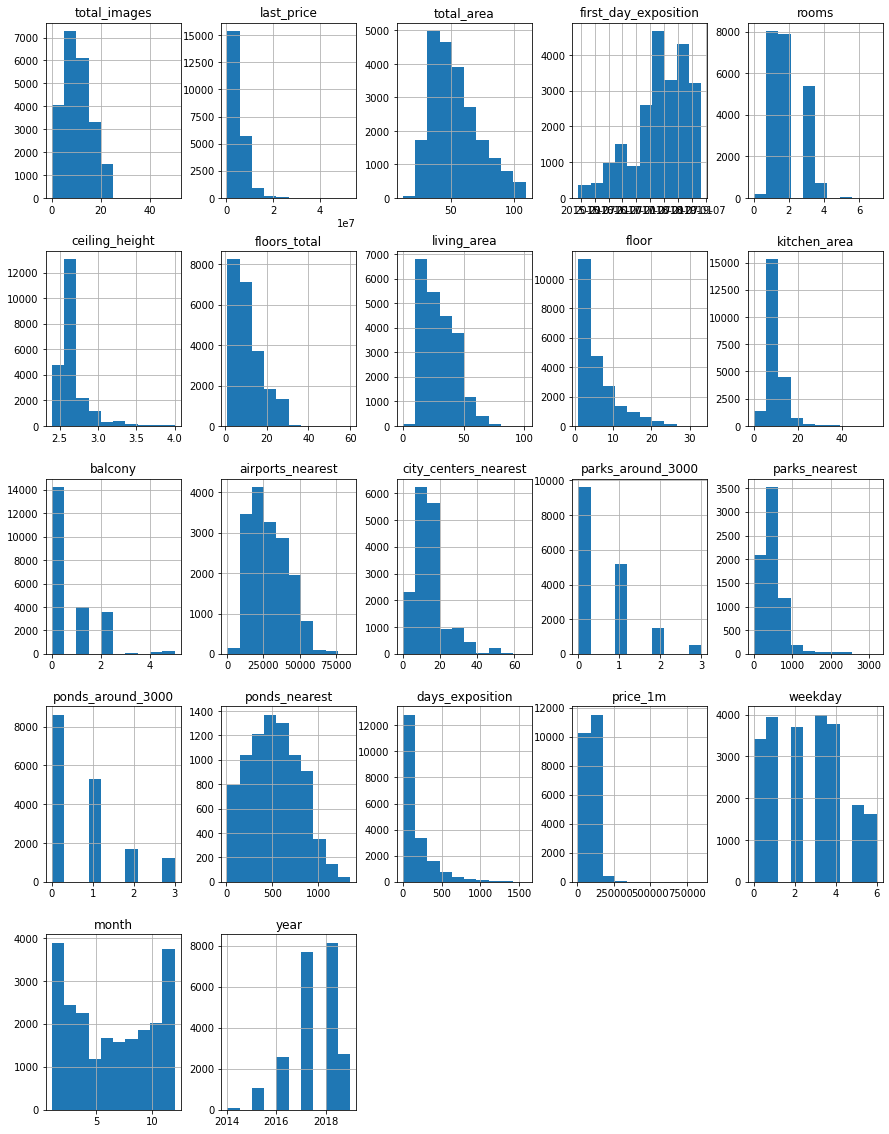

In [69]:
data.hist(figsize=(15,20));

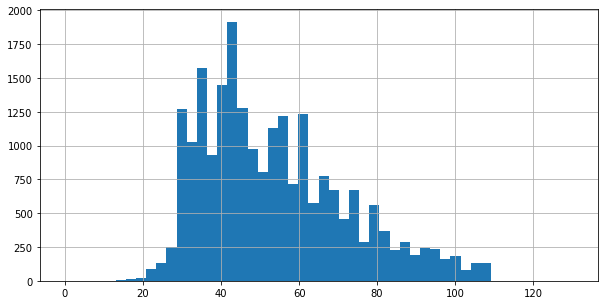

In [70]:
# общая площадь
data['total_area'].hist(range=(0, 130), bins=50, figsize=(10,5));

По графику видно, что основная часть квартир имеет площадь от 30 (м²)до 60 (м²). Минимальная площадь квартиры - 12 (м²), а максимальная 104(м²). Медиана равна 49(м²). 

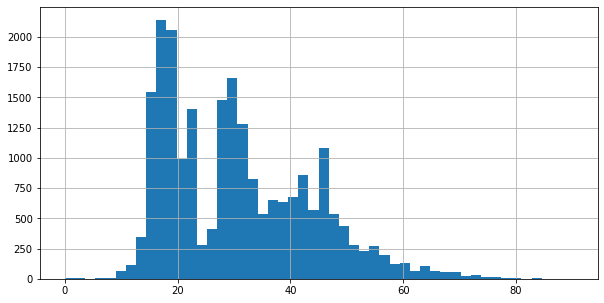

In [71]:
# жилая площадь
data['living_area'].hist(range=(0, 90), bins=50, figsize=(10,5));

Самые распространенные варианты квартир с жилой площадью от 18 (м²) до 45 (м²). Максимальная жилая площадь квартиры 89 (м²) кв м. Минимальная равна 0, потому что в выборке есть апартаменты, а они не являются жилыми помещениеми. Медиана равна 28 (м²).

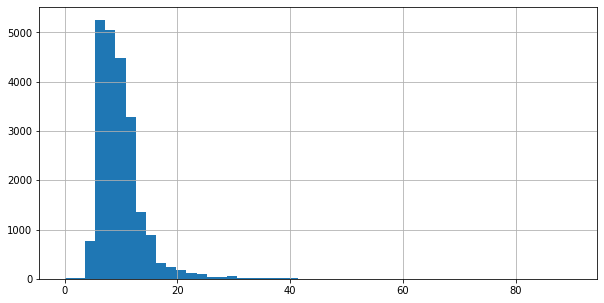

In [72]:
# площадь кухни 
data['kitchen_area'].hist(range=(0, 90), bins=50, figsize=(10,5));

Площадь кухни в основном равна в квартирах от 5 до 15 (м²). Максимальная плошадь равна 50(м²), медиана 8.6 (м²). Минимальная площадь тоже равна 0, потому что в выборке есть апартаменты. Больше 30 - единичные случаи.

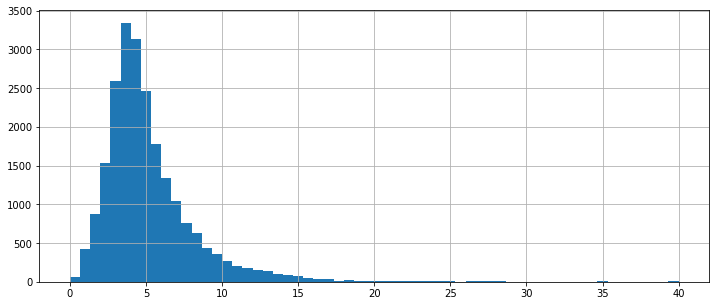

In [73]:
# цена объекта 
(data['last_price']/1000000).hist(bins=60, figsize=(12,5), range = (0, 40));

In [74]:
(data['last_price']).describe().astype('int')

count       22278
mean      5236028
std       3235065
min        430000
25%       3350000
50%       4500000
75%       6200000
max      53000000
Name: last_price, dtype: int64

Стоимость большинства квартир находится в диапазоне от 2 млн до 6 миллионов - нормальная стоимость.  Медианная стоимость 4.5 млн, средняя 5.2 млн, минимальная 430 тыс, максимальная 53 млн. 

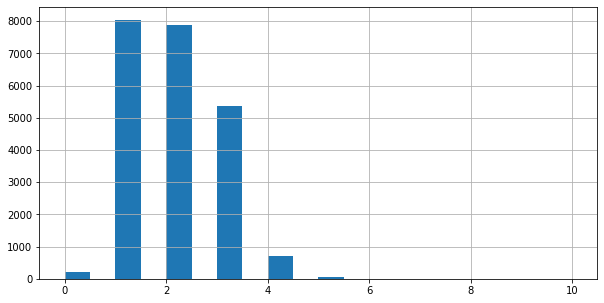

In [75]:
# количество комнат
data['rooms'].hist(range=(0, 10), bins=20, figsize=(10,5));

Видим на графике, что в основном продают 1-3 комнатные квартиры. Самые популярные однокомнатные, потом двухкомнатные. Есть так же без комнат - это студии скорее всего. Максимальное количество комнат 6. Студий и квартир, где больше 4-х комнат не так много.  

count    22278.000000
mean         2.680426
std          0.191515
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

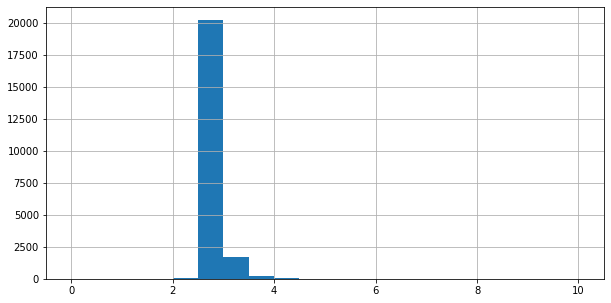

In [76]:
# высота потолков
data['ceiling_height'].hist(range=(0, 10), bins=20, figsize=(10,5));
data['ceiling_height'].describe()

Высота потолков равна примерно 2,5 - 2,8 м. Максимальная высота - 4 м., а минимальная 2.4, мы установили это ранее. 

count    22278.000000
mean         5.915657
std          4.908639
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

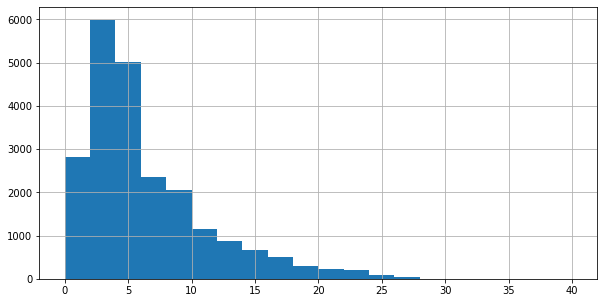

In [77]:
# этаж квартиры
data['floor'].hist(range=(0, 40), bins=20, figsize=(10,5));
data['floor'].describe()

Большинство квартир находится на 1-10 этажах.  Максимальный этаж - 33. 

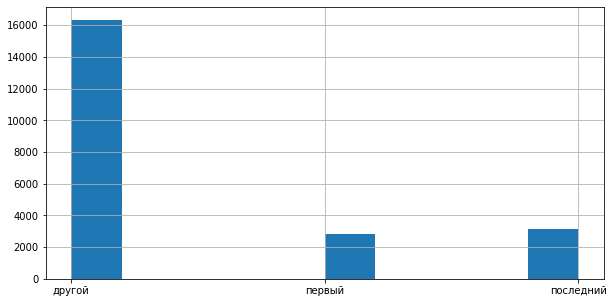

In [78]:
# тип этажа квартиры («первый», «последний», «другой»)
data['floor_type'].hist(figsize=(10,5)); 

Количество квартир, находящихся на первых и последних этажах почти одинаковое и совсем небольшое. Обычно квартиры на первом и последнем этажах покупают реже, так как видят в этом риски. Большинство квартир находятся между 1 и последним этажом.

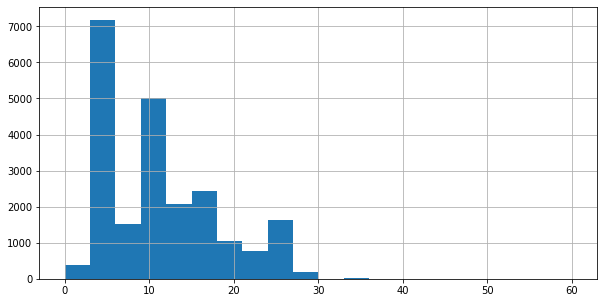

In [79]:
# общее количество этажей в доме
data['floors_total'].hist(range=(0, 60), bins=20, figsize=(10,5));

Достаточно много квартир 5-ти этажек (5364), скорее всего там квартиры дешевле и 9-ти этажек (3657). Реже покупают квартиры в многоэтажках.

In [80]:
data['floors_total'].describe()

count    22278.000000
mean        10.793563
std          6.637328
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [81]:
data['floors_total'].value_counts()

5     5500
9     3697
12    1312
16    1296
10    1125
4     1063
25    1044
17     806
6      707
3      614
14     543
18     485
7      479
24     459
2      363
15     343
23     342
8      325
19     322
22     281
20     246
13     217
11     185
27     163
21     157
26     123
1       27
35      24
28      21
36       3
52       1
34       1
60       1
29       1
33       1
37       1
Name: floors_total, dtype: int64

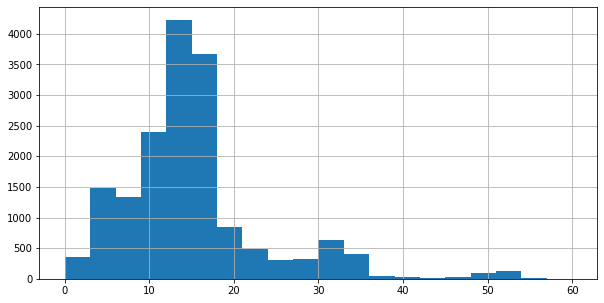

In [82]:
# расстояние до центра города в метрах
data['city_centers_nearest'].hist(range=(0, 60), bins=20, figsize=(10,5));

In [83]:
data['city_centers_nearest'].describe()

count    16810.000000
mean        14.672933
std          8.507323
min          0.000000
25%         10.000000
50%         13.000000
75%         17.000000
max         66.000000
Name: city_centers_nearest, dtype: float64

В основном квартиры находятся в 10-18 км от центра. Пик квартир находится где-то в 13 км от центра. Медиана равна 14 км. Самая дальняя квартира от центра находится в 66 км. 

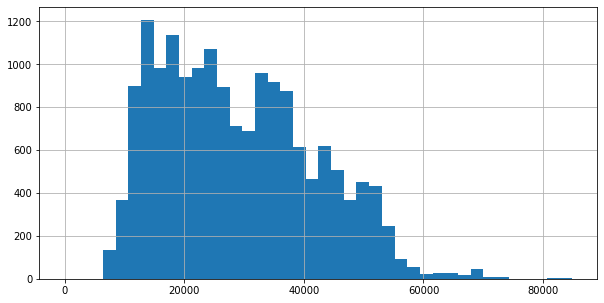

In [84]:
# расстояние до ближайшего аэропорта
data['airports_nearest'].hist(bins=40, figsize=(10,5));

В основном квартиры находятся в 15-40 км до ближайшего аэропорта. Медиана равна 27 км, в среднем до аэропорта 29 км. 

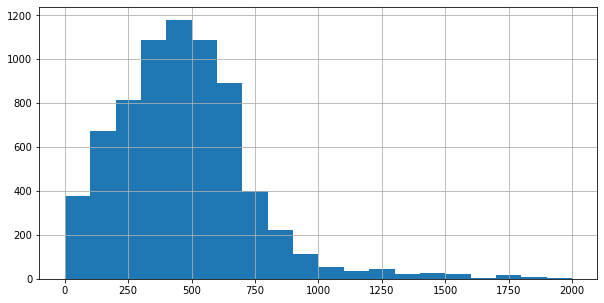

In [85]:
# расстояние до ближайшего парка
data['parks_nearest'].hist(range=(0, 2000), bins=20, figsize=(10,5));

In [86]:
data['parks_nearest'].describe()

count    7182.00000
mean      493.51462
std       340.42358
min         1.00000
25%       289.00000
50%       456.00000
75%       616.00000
max      3190.00000
Name: parks_nearest, dtype: float64

Большая часть квартир находятся в пределах 230-650 м до парка. Среднее значение 490 м до парка. Видим по графику, что чем дальше находятся квартира от парка, тем реже ее покупают.

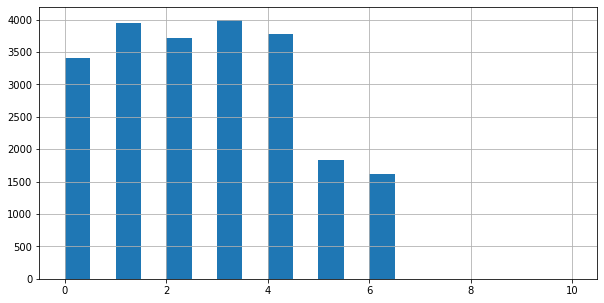

In [87]:
# день публикации объявления
data['weekday'].hist(range=(0, 10), bins=20, figsize=(10,5));

In [88]:
data['weekday'].value_counts()

3    3995
1    3943
4    3775
2    3710
0    3410
5    1834
6    1611
Name: weekday, dtype: int64

В будни квартиры публикают чаще, чем в выходные. 

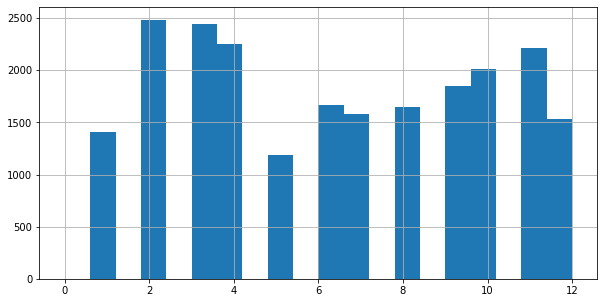

In [89]:
# месяц публикации объявления
data['month'].hist(range=(0, 12), bins=20, figsize=(10,5));

In [90]:
data['month'].value_counts()

2     2483
3     2447
4     2255
11    2214
10    2017
9     1854
6     1663
8     1645
7     1577
12    1530
1     1405
5     1188
Name: month, dtype: int64

Весной и осенью чаще выставляют объявления на продажу. Меньше всего в мае и январе. В летний период наблюдаем спад предложений. 

In [91]:
data['days_exposition'].describe() # сколько дней «висело» каждое объявление

count    19449.000000
mean       174.398272
std        212.403231
min          1.000000
25%         44.000000
50%         92.000000
75%        221.000000
max       1580.000000
Name: days_exposition, dtype: float64

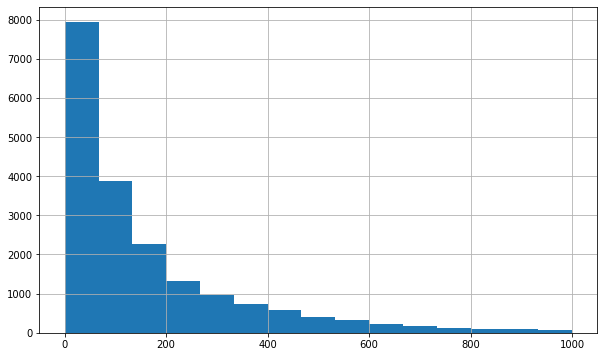

In [92]:
data['days_exposition'].hist(range=(0, 1000), bins=15, figsize=(10,6));

В среднем квартиры продают за 174 дня (примерно полгода). А вот медиана равна 92. Скорее всего такая разница из-за аномальных значений, а они могли появиться в следствии того, что люди после продажи квартиры не закрыли свое объявление. Большинство квартир продавались в течение первых 50-60 дней. 

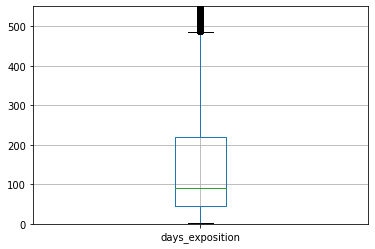

In [93]:
# Посмотрим на диаграмму размаха.
data.boxplot(column=['days_exposition'])
plt.ylim(0, 550);

In [94]:
len(data[(data['days_exposition']>480)]) # посмотрим сколько таких квартир 

1666

Верхний "ус" заканчивается около 480 дней. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Квартиры, которые продавались дольше 480 дней - аномально долгие продажи. Значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.

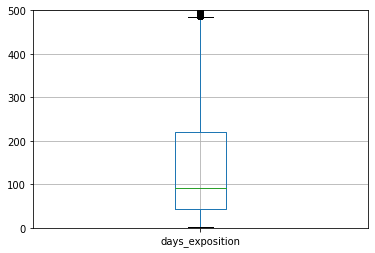

In [95]:
data.boxplot(column=['days_exposition'])
plt.ylim(0, 500);

In [96]:
# Посмотрим, сколько квартир находятся ниже первого квартиля. 
len(data[(data['days_exposition']<50)]) 


6130

Итак, в основном квартиры продают примерно за 90 дней. Продажи, которые длятся более 500 дней будем считать необычно долгими.   
Все квартиры, не попавшие в межквартильный размах будем считать быстропроданными, т.е. проданными в промежутке до 50 дней. 

Какие факторы больше всего влияют на общую стоимость объекта?

In [97]:
data[['last_price', 'total_area','living_area', 'kitchen_area', 'rooms', 'floor_type']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.677066,0.533130,0.518179,0.379883
total_area,0.677066,1.000000,0.895649,0.479927,0.788027
living_area,0.533130,0.895649,1.000000,0.194921,0.863721
kitchen_area,0.518179,0.479927,0.194921,1.000000,0.096516
rooms,0.379883,0.788027,0.863721,0.096516,1.000000


Коррелируют между собой общая площадь и цена квартиры (0,68) и есть небольшая корреляция у цены с жилой площадью (0,54). 

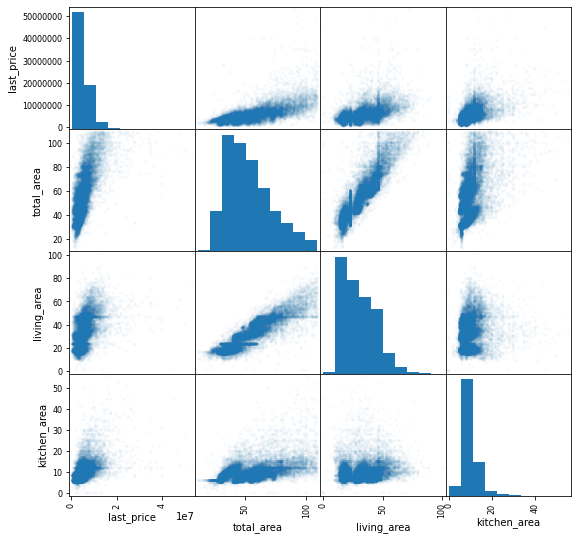

In [98]:
factors = data[['last_price', 'total_area','living_area', 'kitchen_area']]
pd.plotting.scatter_matrix(factors, figsize=(9, 9), alpha=0.03);

Существенный фактор, который влияет на стоимость квартиры это ее общая площадь квартиры. Чем больше площадь, тем выше стоимость. Так же прослеживается небольшая корреляция цены и жилой площади и площади кухни. Но сильнее всего коррелируют между собой след. признаки : общая площадь и жилая площадь (0,89), общая площадь и кол-во комнат (0,8), жилая площадь и кол-во комнат (0,86).

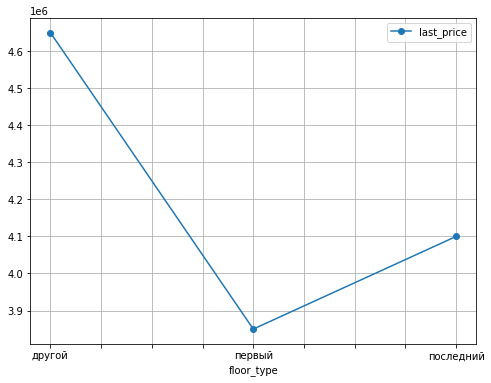

In [99]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(8, 6));

На первом этаже стоимость квартиры ниже всего, примерно такая же стоимость и  на последнем этаже. Это логично, люди стараются не брать квартиры на первом и последнем этажах, тк. видят риски.

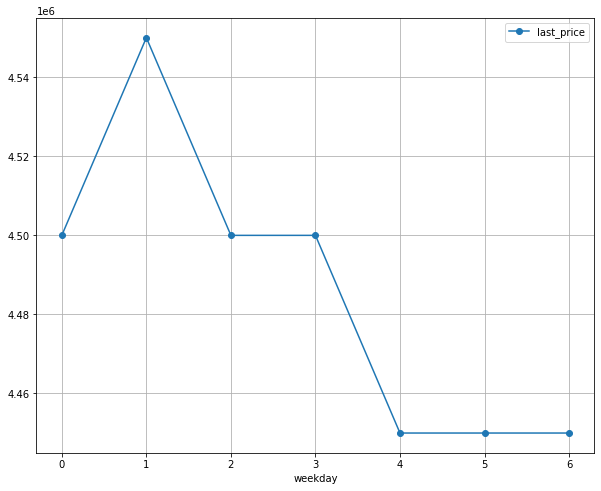

In [100]:
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(10, 8));

К выходным наблюдается спад цены. В будни люди выкладывают объявления с высокими ценами, особенно во вторник, скорее всего активность в рабочие будни выше. В выходные люди отдыхают.

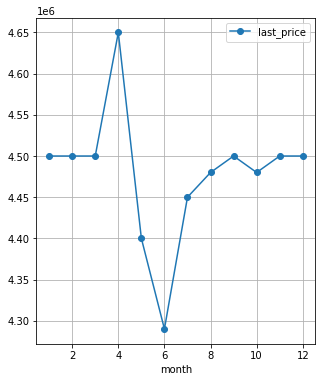

In [101]:
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(5, 6));

В июне самые низкие цены на недвижимость. А вот самые высокие в апреле. 

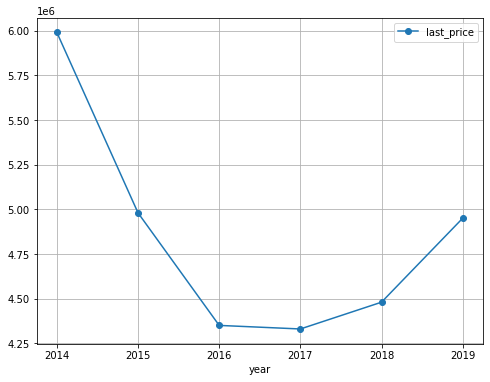

In [102]:
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(8, 6));

С 2014 по 2016 наблюдаем снижение цен на продажу квартиры и с 2017 по 2019 подъем.

Итак, небольшие выводы:
- существенный фактор, который влияет на стоимость квартиры это ее общая площадь квартиры;
- стоимость квартиры ниже на первом и последнем этажах;
- в выходные дни стоимость квартир меньше, чем в будни;
- самые низкие цены в июне;
- с 2014 по 2016 происходило снижение цен на продажу квартиры, а с 2017 по 2019 подъем.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [103]:
locality_10 = data['locality_name'].value_counts().head(10)
price_locality_10 = data.query('locality_name in @locality_10.index').pivot_table(index='locality_name', values = 'price_1m', aggfunc='mean')
price_locality_10.sort_values(by = 'price_1m', ascending = False).round(2)

,price_1m
locality_name,
Санкт-Петербург,111032.37
Пушкин,102388.36
деревня Кудрово,92938.19
поселок Парголово,90919.69
поселок Мурино,86312.03
поселок Шушары,79142.64
Колпино,75682.43
Гатчина,69220.85
Всеволожск,69006.84


Cамая высокая стоимость квадратного метра в Санкт-Петербурге (106057 руб). Самая низкая в Выборге(58351). 

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [104]:
city_centers = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'city_centers_nearest', values = 'price_1m', aggfunc = 'mean')
city_centers.round(2)

,price_1m
city_centers_nearest,
0.0,230823.03
1.0,150564.14
2.0,144472.55
3.0,119828.38
4.0,129942.18
5.0,135255.19
6.0,134192.45
7.0,133256.98
8.0,123270.84


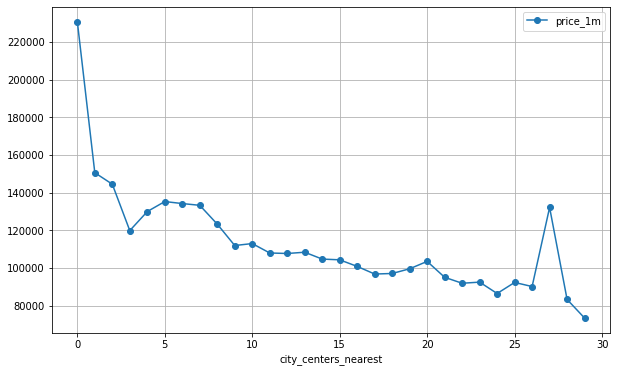

In [105]:
city_centers.plot(style='o-', grid=True, figsize=(10, 6));

Чем дальше от центра находится квартира, тем дешевле. Самые дорогие квартиры в центре.

### Общий вывод

Таким образом, мы обработали архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. 
Провели достаточно большую предобработку данных, а именно: 
- обработали пропущенные значения во всех столбцах где это было возможно; 
- изменили тип данных в некоторых столбцах для удобства дальнейшей работы; 
- избавились от аномалий;
- устранили неявные дубликаты в названиях населённых пунктов.
- так же добавили дополнительные столбцы для удобства дальнейших расчетов. 
Изучив данных, выяснили: 
- существенный фактор, который влияет на стоимость квартиры это ее общая площадь квартиры. Чем больше площадь, тем выше стоимость.Большая часть продаваемых квартир имеет площадь от 30 (м²)до 60 (м²). Самые распространенные варианты квартир с жилой площадью от 18 (м²) до 45 (м²). Максимальная жилая площадь квартиры 89 (м²) кв м. Минимальная равна 0, потому что в выборке есть апартаменты, а они не являются жилыми помещениеми.
- стоимость большинства квартир находится в диапазоне от 2 млн до 6 миллионов - нормальная стоимость.  Медианная стоимость 4.5 млн, средняя 5.2 млн, минимальная 430 тыс, максимальная 53 млн.  
- продают в основном 1-3 комнатные квартиры. Самые популярные однокомнатные, а потом двухкомнатные. Есть так же квартиры без комнат - это студии. 
- высота потолков в продаваемых квартирах равна примерно 2,5 - 2,8 м.
- квартиры на первом и последнем этажах покупают реже. Большинство квартир находятся между 1 и последним этажами.
- продажа квартиры осуществляется в среднем до полугода, но так же встречаются быстрые продажи за 50-60 дней. 
- незначительно на стоимость квартиры влияют день, месяц, год размещения. К выходным наблюдается спад цены, в рабочие будни активность больше. В июне самые низкие цены на недвижимость. А вот самые высокие в апреле. с 2014 по 2016 происходило снижение цен на продажу квартиры, а с 2017 по 2019 подъем.

Так же мы провели анализ топ-10 населенных пунктов по количеству объявлений:
- самая высокая стоимость квадратного метра в Санкт-Петербурге (111032 руб);
- самая низкая в Выборге(58351). 
Чем дальше находится квартира от центра, тем она дешевле. Самые дорогие квартиры в пределах центра.

Отмечу тот факт, что в  полученных данных было много пропусков, особенно в картографических данных, а это могло повлиять на результат исследования. Можно сделать обязательными для заполнения эти поля.
